# Group 26 Project Proposal

### Introduction: 

There are a variety of test prep classes that are available to students at varying prices. All of these courses claim to improve students' performance on exams. 

Predictive Question: Can we use the exam scores of students to predict whether or not they attended a test preparation course?

We will use the `all_exams.csv` data set to determine whether or not a student took a test prep course. Their exam scores from math, reading, and writing will helps us identify weather or not they attended one of these test prep courses. The data set contains information about high school students from the US, and includes the students gender, race/ethnicity, parental level of education, lunch, test preparation course attendance, and the students' scores for a math exam, reading exam, and writing exam.

We increased the size of the sample by combing the files we downloaded because the data is generated spontaneously. Additionally, our final data set is composed of three combined data sets to increase our sample size to 1200. By doing this, we expect our model to have a higher accuracy because it will be able to gain familiarity with more data examples.

### Primary Exploratory Data Analysis:

In [3]:
#Run this cell 
library(tidyverse)
library(RColorBrewer)
options(repr.matrix.max.rows = 10)
all_exams<-read_csv("GP_data/all_exams.csv")
all_exams

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  gender = col_character(),
  `race/ethnicity` = col_character(),
  `parental level of education` = col_character(),
  lunch = col_character(),
  `test preparation course` = col_character(),
  `math score` = col_double(),
  `reading score` = col_double(),
  `writing score` = col_double()
)



X1,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,male,group D,some college,standard,none,69,63,62
2,female,group E,bachelor's degree,free/reduced,completed,65,78,80
3,female,group C,some high school,standard,none,57,56,59
4,female,group D,associate's degree,free/reduced,none,62,73,71
5,male,group C,some college,free/reduced,none,46,52,46
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1196,male,group C,associate's degree,standard,completed,65,63,62
1197,female,group C,some high school,standard,none,69,74,68
1198,female,group D,some college,free/reduced,none,43,48,45


The data looks tidy to other than fixing the column names so the spaces b/w wrods are _ instead. this will make maniputlating the data easier in future anaylsis. I did think we could do pivot longer and make a scores varible but the the obervation pre student would be spread out acorss 3 rows which not tidy. and should change all the chr data types to factors so it will be easier to work with in the futrue and don't have to worry about it later on. dbl data type of the scores is reasonable and we are going to remove X1 from the df b/c not usful so data type doesn't matter.


In [3]:
#expoloratory data analysis lets find out the number of student in each category of preparation course column 
#first we should change column names so that there ar _ instead of spaces so they are easier to use
#and we should remove the X1 column 
#we could look at what demographic of students attend the test prep (based on lunch or parent level eductation, gender?)
#look at students who did above average what there parents level of education is or see there lunch(If house hold can't 
#afford food that is stressful so may effect scores )


In [21]:
#first we should change column names so that there are _ instead of spaces so they are easier to work with
colnames(all_exams)<-c("X1", "gender", "race_ethnicity", "parental_level_of_education",
"lunch", "test_preparation_course", "math_score", "reading_score", "writing_score")
#all_exams

# remove the X1 column because it is not important 
#even though only care about the test_preparation_course, math_score, reading_score, writing_score for our question 
#keeping the other stuff incase we want to explore if they have any relationships

#need to change all the chr data types to fct types. this will make the easier to work with  
fct_exams<-select(all_exams, gender:writing_score)%>%
mutate(across(gender:test_preparation_course, as.factor))
fct_exams

gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
male,group D,some college,standard,none,69,63,62
female,group E,bachelor's degree,free/reduced,completed,65,78,80
female,group C,some high school,standard,none,57,56,59
female,group D,associate's degree,free/reduced,none,62,73,71
male,group C,some college,free/reduced,none,46,52,46
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
male,group C,associate's degree,standard,completed,65,63,62
female,group C,some high school,standard,none,69,74,68
female,group D,some college,free/reduced,none,43,48,45


I don't know if we should remove anymore columns other than the X1 column yet, because if we want a more accurate prediction we could use more predictor varibles and I don't want to limit our options 

`summarise()` ungrouping output (override with `.groups` argument)



test_preparation_course,n
<fct>,<int>
completed,411
none,789


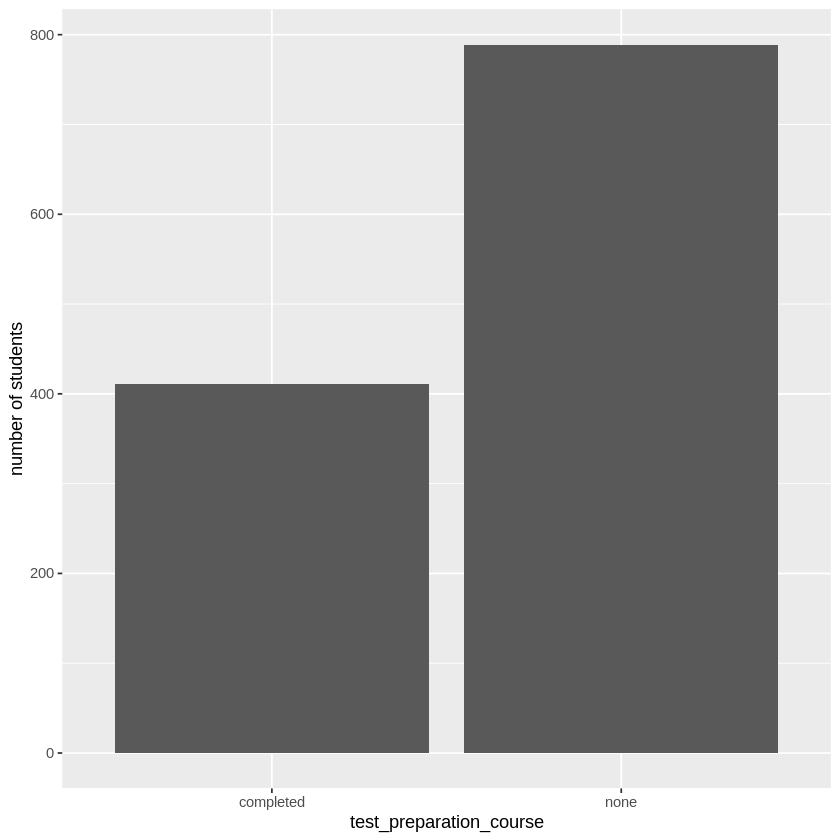

In [7]:
#do see the number of student in each category of test_preparation_course varible we can either group_by and summarize
#or we can visulize it with a bar graph 

prep_exam<-fct_exams%>%
group_by(test_preparation_course)%>%
summarize(n=n())
prep_exam

plot_prep<-fct_exams%>%
ggplot(aes(x=test_preparation_course))+
geom_bar()+
labs(x="test_preparation_course", y="number of students")
plot_prep

**overall there are more people who didn't attend prep course which may cause biases in futrue analysis. may effect our accuracy and prediction b/c there are less data on students who completed the prep course to train the model on so potenially less acurate prediction. (will this effect how the data is split???)** 

In [37]:
#find out how attendance effect average of each student 
exam_data<-fct_exams%>%
rowwise(math_score:writing_score)%>%
mutate(avg_grade=mean(math_score:writing_score))%>%
select(test_preparation_course, math_score, reading_score, writing_score, avg_grade)
exam_data

test_preparation_course,math_score,reading_score,writing_score,avg_grade
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
none,69,63,62,65.5
completed,65,78,80,72.5
none,57,56,59,58.0
none,62,73,71,66.5
none,46,52,46,46.0
⋮,⋮,⋮,⋮,⋮
completed,65,63,62,63.5
none,69,74,68,68.5
none,43,48,45,44.0


In [38]:
avg_overall<-exam_data%>%
group_by(test_preparation_course)%>%
summarize(avg_overall_score=mean(avg_grade))
avg_overall

#using map to check my work, and both have the corect number of row (# of rows is same as the count for prep course categories )
map_cplt<-exam_data%>%
filter(test_preparation_course=="completed")%>%
select(avg_grade)%>%
map_df(mean)
#map_cplt

map_none<-exam_data%>%
filter(test_preparation_course=="none")%>%
select(avg_grade)%>%
map_df(mean)
#map_none


`summarise()` ungrouping output (override with `.groups` argument)



test_preparation_course,avg_overall_score
<fct>,<dbl>
completed,72.78102
none,64.78644


Adding missing grouping variables: `math_score`, `reading_score`, `writing_score`

Adding missing grouping variables: `math_score`, `reading_score`, `writing_score`



The overall average grade of students who completed to test preparation course is higher than the overall average grade of students who didn't attend the  test preparation course. roughly 35% of students completed to test prep course. This suggest that attending the test preparation course may lead to higher average compared to if you didn't attend. If we wanted to comfirm this inquiry we could collect more data about the same students and see how their grades change if they didn't attend this class but attend a class in the future or vis versa. 

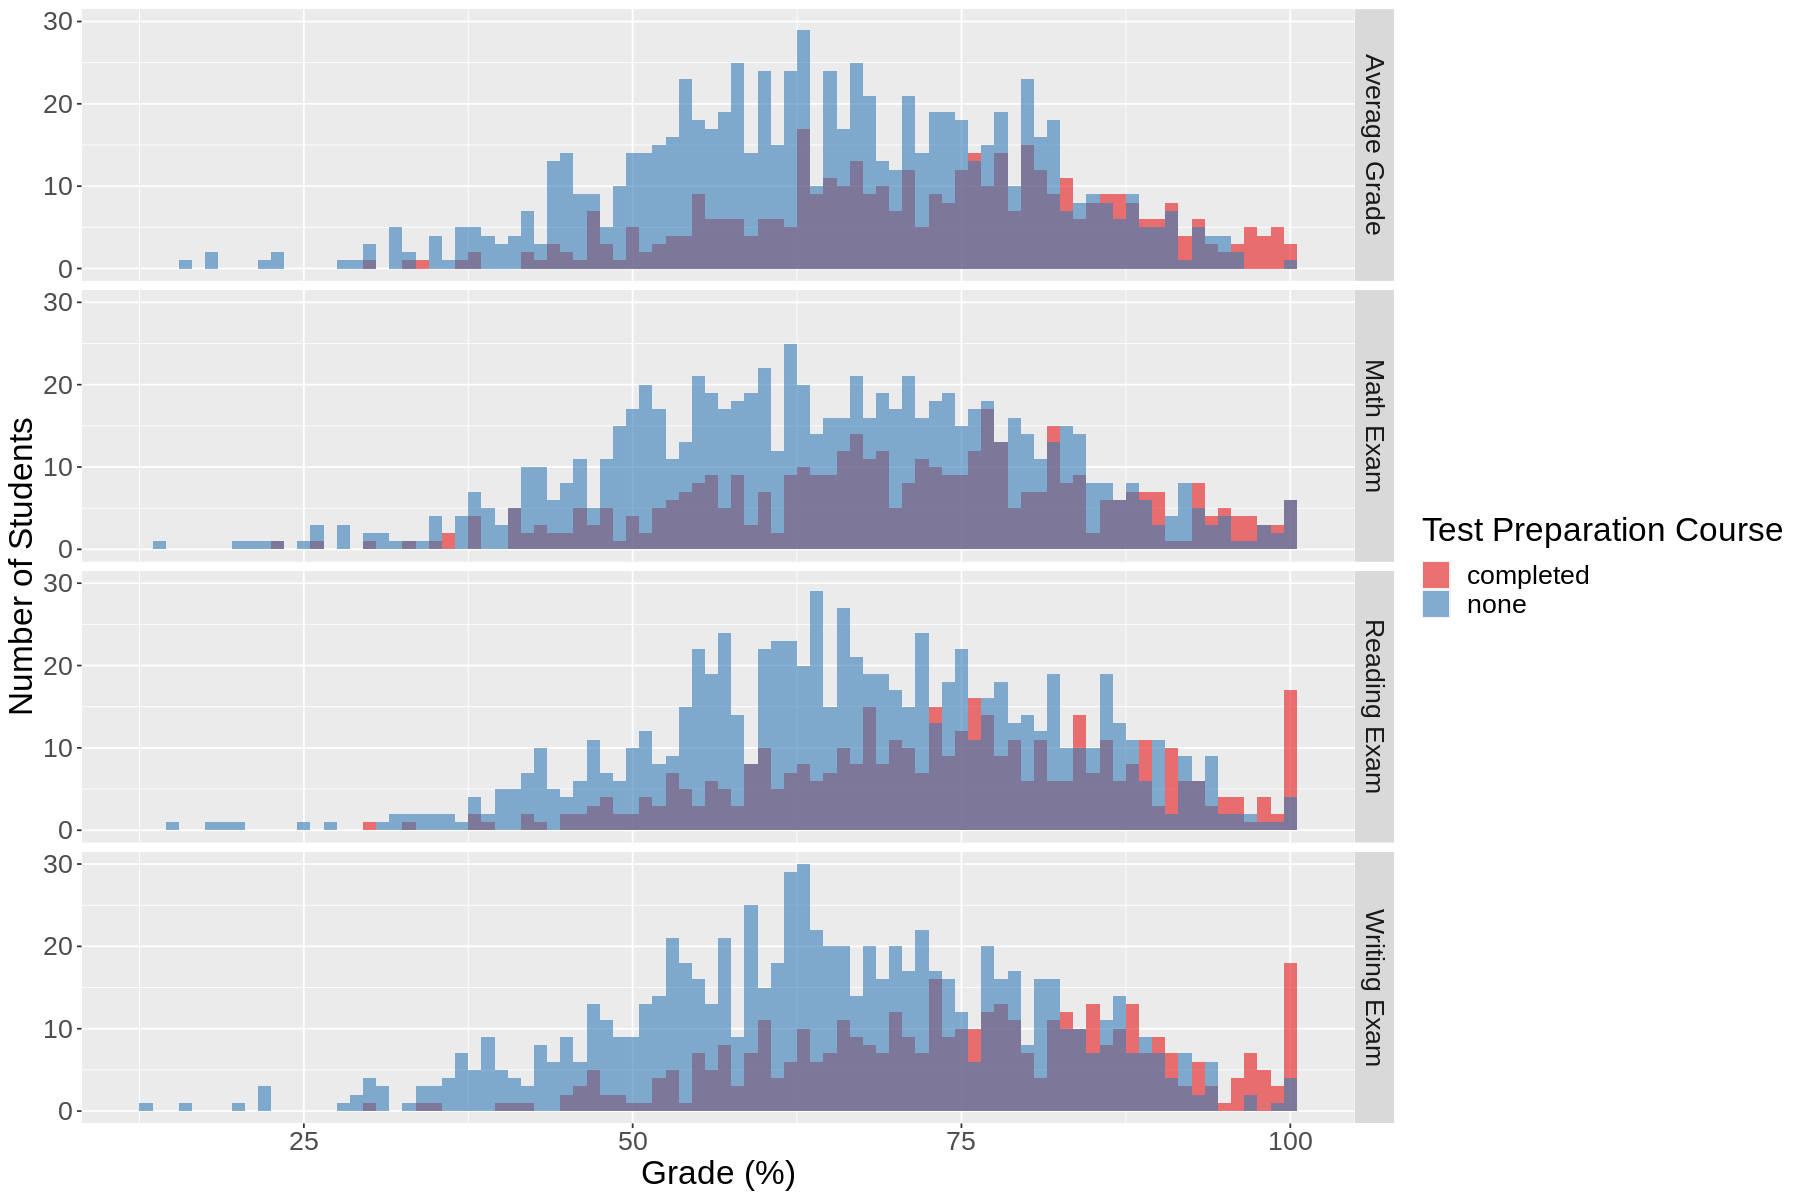

In [55]:
#for the ease of compare the garphs made data untidy so we can use facet_grid. 
untidy_exams<-exam_data%>%
pivot_longer(cols=(math_score:avg_grade),
            names_to="subject",
            values_to="score")
#untidy_exams

sudject_names<-c(math_score="Math Exam", reading_score="Reading Exam", writing_score="Writing Exam", avg_grade="Average Grade")
#sudject_names

options(repr.plot.width = 15, repr.plot.height = 10) 
plot_exam4<-untidy_exams%>%
ggplot(aes(x=score, fill=test_preparation_course))+
geom_histogram(position="identity", alpha=0.6, bins=100, binwidth=1)+
facet_grid(subject ~ ., labeller=as_labeller(sudject_names))+
theme(text = element_text(size = 20))+
labs(x="Grade (%)", y="Number of Students", fill="Test Preparation Course")+
scale_fill_brewer(palette = "Set1")
plot_exam4



overall the grade distroducions of peopel who attended the prep class is to the right of the people who didn't but i wouldn't consider it a strong relationship. b/c there is so many more observation of none compared to completed is would be expected that they have a count of students in there bins(higher bins) and that they have a centered bell curve, making it harder to see a tru relationship. so can't confidently say the class does help improve your marks. I would suggest to the the class that refine the math portion b/c no real difference in the scores distrubtion of the people who attended course or didn't for math exam so course could improve upon 
that subject if want. the writing and reading plots show that the ppl who attend course where on the upper half of the bell curve. no real difference in the average grade distrobution of the people who attended course or didn't for except in the top 5 grade bins.

**Note**: when visulize the prediction results we would not use the untidy data above because we putting a vertical line in where our new obervation sits would not work. There will be 4 diff lines of code and 4 diff plots and will use `exam_data`

### Methods:

**include:**
Explain how you will conduct either your data analysis and which variables/columns you will use. 
Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
Describe at least one way that you will visualize the results


In [18]:
#do we need to scale and center our data even though there is no units 
#need to figure out the visual plot to do what will the varibles be
#if we want to use all 3 exam score varibles how will be plot that? we could make give comdine all 3 column to score 
#and on graph use different shapes for different exam type and diff colors for test prep attenance but so score would be 
#x axis but what would we make the y axis?
#or we could do "Base off the exam scores for writing and math can you determine if a student attended a prep course?"
#but look up how to do classification with more than two varibles (b/c it would be more acuarte b/c we don't know if the 
#course spent more time on a specific exam or not which could effect the accuracy


#when finding the k are we going to find seperate ones for each exam, like if k=3 will be find the 3 closest math_scores
#to the new obervations math_score and find the 3 closest reading_scores to the new obervations reading_score
#but still how would we graph 3 varibles and what like x axis could be math_score and y axos could be reading_score but
#but what would we use for the writing_score? 
#I guess graph could be 3D but not ideal
#need to ask TA how to plot 3 varibles so we can find the distance b/w then the find our k's 

-Using 4 variables (math score, reading score, writing score, attendance at test prep course)
-Select for the the 4 variables
-Visualization?? (not sure how to plot all the variables)
Once we figure out the visualization, we can use K nearest neighbor to predict a new observation/test how well our model works.


 Describe at least one way that you will visualize the results:
could put a vertical line in histograme based where new obervation sits to see where they land in the ogrinals data set. so can see new obervations impact on the histogram. for example  if new obervation was math_score=54, writing=66, reading_score=75 avg_grade=65 we would see the impact say 50 student got 75% on reading exam now 51 student got 75% on reading reading exam.  so put vertical lines at those values on the 4 histograme . 

we will be using the `exam_data` file of our prediction anaylysis 

### Expected outcomes and significance

Our model predicted whether or not a student attended a test prep course based on their scores over the math, reading, and writing exams. We expected to find a correlation between high exam scores and attendance to test prep classes. This would determine the effectiveness of the test prep course in the performance of students on different exams. Based on the results of this analysis, future projects might be interested in examining the impact of the test prep courses compared to self-studying methods in students. Other potential areas of exploration could be considering external factors that may affect the students' level of concentration despite attending a test prep course. For example, if a student is not well nourished and cannot concentrate on the content of the test prep course, how will that affect their final scores? 